In [1]:
%cd ~/fedRec

/root/fedRec


In [5]:
import pandas as pd
import os


full_csv_folder = './iid_clients/train'
NUM_CLIENT = 10
for i in range(NUM_CLIENT):
    df = pd.read_csv(
        os.path.join(full_csv_folder, f'{i}.csv'), header=None
    )
    audio_column = df.iloc[:,0]
    image_column = df.iloc[:,1]
    audio_column.to_csv(
        os.path.join(full_csv_folder, f'{i}_audio.csv'),
        index=False,
        header=False
    )
    image_column.to_csv(
        os.path.join(full_csv_folder, f'{i}_image.csv'),
        index=False,
        header=False
    )
    
    

In [1]:
audio_mnist_path = '/root/autodl-tmp/audio_mnist'
image_mnist_path = '/root/autodl-tmp/image_mnist'

In [2]:
from fed.utils.sampling import dirichelet_sampling as non_iid_sampling
from fed.utils.sampling import iid_sampling

from experiments.mmvae.mnist.dataset import _extract_label
import pandas as pd
from pathlib import Path

client_csv_path = '/root/autodl-tmp/csv/mmMNIST_client.csv'
def get_criterion(csv_path):
    res = []
    df = pd.read_csv(csv_path).to_numpy()
    for filename, _ in df:
        res.append(_extract_label(filename))
    return res
    

sample_crit = get_criterion(client_csv_path)

In [4]:
iid_sampling(
    client_csv_path,
    sample_crit,
    num_client=10,
    index_col=False,
    seed=42,
    train_test_split_ratio=0.75,
    dst_path='./iid_clients'
)

In [5]:
clients_crit = []
for i in range(10):
    csv_path = f'./iid_clients/train/{i}.csv'
    clients_crit.append(get_criterion(csv_path))


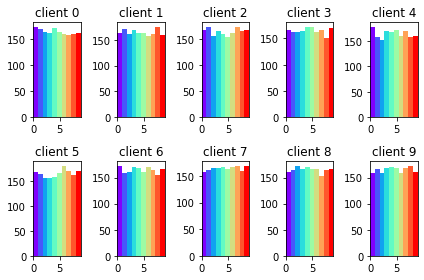

In [6]:
from utils.visual import draw_bin_grid
draw_bin_grid(clients_crit, (2, 5), title_prefix='client')

In [7]:
# import os
# import random
# import numpy as np
# import pandas as pd

# def _recursive_traverse(root_path):

#   def _impl(path, res):
#     if path.is_file():
#       res.append(path.path)
#       return
#     elif path.is_dir():
#       for obj in os.scandir(path):
#         _impl(obj, res)
#     return

#   res = []
#   for obj in os.scandir(root_path):
#     _impl(obj, res)
#   return res

# def _extract_label(file_iterator):
#   res = [[] for _ in range(10)]
#   for file in file_iterator:
#     label = int(os.path.basename(file).split('_')[0])
#     res[label].append(file)
#   return res


# def random_pairing(audio_path, image_path, seed=272, save_path='./mmMNIST.csv'):
#   pipeline = lambda x: _extract_label(_recursive_traverse(x))
#   audio_files = pipeline(audio_path)
#   image_files = pipeline(image_path)

#   random.seed(seed)
#   for audio, image in zip(audio_files, image_files):
#     random.shuffle(audio)
#     random.shuffle(image)
  
#   client_audio = []; client_image = []
#   server_audio = []; server_image = []
#   for audio, image in zip(audio_files, image_files):
#         client_audio.append(audio[:2200])
#         client_image.append(image[:2200])
#         server_audio.append(audio[2200:])
#         server_image.append(image[2200:])

#   client_audio = np.array(client_audio).reshape(1, -1)
#   client_image = np.array(client_image).reshape(1, -1)

#   server_audio = np.array(server_audio).reshape(1, -1)
#   server_image = np.array(server_image).reshape(1, -1)

#   client_df = pd.DataFrame(
#       np.concatenate([client_audio, client_image], axis=0).T,
#       columns=['audio', 'image']
#   )
#   client_df.to_csv('./mmMNIST_client.csv', index=False)

#   server_df = pd.DataFrame(
#       np.concatenate([server_audio, server_image], axis=0).T,
#       columns=['audio', 'image']
#   )
#   server_df.to_csv('./mmMNIST_server.csv', index=False)


# random_pairing(audio_mnist_path, image_mnist_path)